In [201]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
leagues = ['E0']
start_year, end_year = 2023, 2024
util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../../data/Data.csv


In [203]:
data = util.load_data(data_folder, file_name)
data = data[data['HomeTeam'].isna() == False]
data = data[data['AwayTeam'].isna() == False]
data = data[data['FTR'].isna() == False]
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2023-08-11,Burnley,Man City,0,3,A,0,2,A,...,8,11,8,6,5,0,0,1,0,2324
1,E0,2023-08-12,Arsenal,Nott'm Forest,2,1,H,2,0,H,...,2,12,12,8,3,2,2,0,0,2324
2,E0,2023-08-12,Bournemouth,West Ham,1,1,D,0,0,D,...,3,9,14,10,4,1,4,0,0,2324
3,E0,2023-08-12,Brighton,Luton,4,1,H,1,0,H,...,3,11,12,6,7,2,2,0,0,2324
4,E0,2023-08-12,Everton,Fulham,0,1,A,0,0,D,...,2,12,6,10,4,0,2,0,0,2324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2024-05-19,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,2,10,8,2,4,1,4,0,0,2324
376,E0,2024-05-19,Liverpool,Wolves,2,0,H,2,0,H,...,3,14,11,10,2,1,1,0,1,2324
377,E0,2024-05-19,Luton,Fulham,2,4,A,1,2,A,...,7,15,20,4,4,5,4,0,0,2324
378,E0,2024-05-19,Man City,West Ham,3,1,H,2,1,H,...,2,3,12,11,2,0,1,0,0,2324


In [204]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
home_factor, draw_factor, away_factor

(np.float64(0.4605263157894737),
 np.float64(0.21578947368421053),
 np.float64(0.3236842105263158))

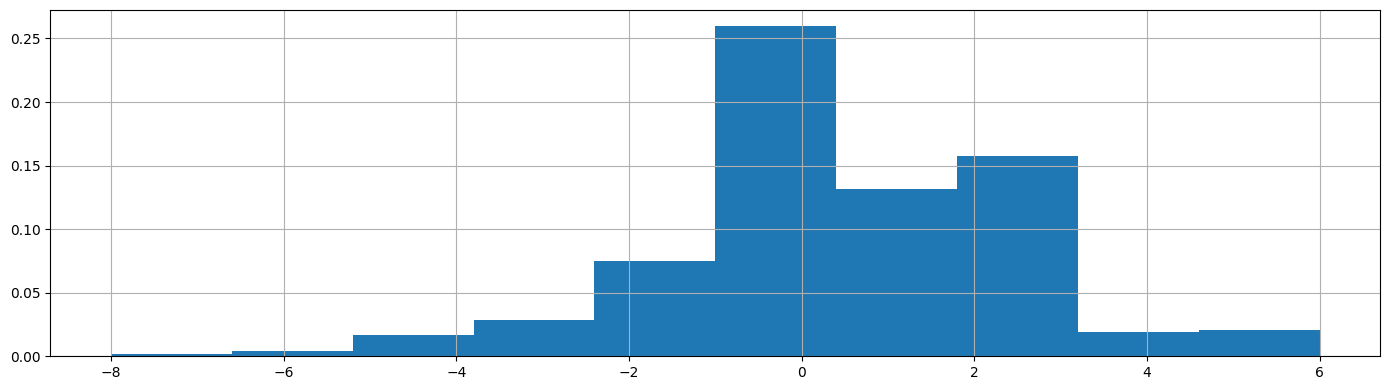

In [205]:
data['Goal difference'] = data['FTHG'] - data['FTAG']
util.plot_histogram(data['Goal difference'], figsize=figsize)

In [206]:
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=100)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Season,Goal difference,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2023-08-11,Burnley,Man City,0,3,A,0,2,A,...,1,0,2324,-3,1500,1500,0,0.562395,0.15534,0.282265
1,E0,2023-08-12,Arsenal,Nott'm Forest,2,1,H,2,0,H,...,0,0,2324,1,1500,1500,0,0.562395,0.15534,0.282265
2,E0,2023-08-12,Bournemouth,West Ham,1,1,D,0,0,D,...,0,0,2324,0,1500,1500,0,0.562395,0.15534,0.282265
3,E0,2023-08-12,Brighton,Luton,4,1,H,1,0,H,...,0,0,2324,3,1500,1500,0,0.562395,0.15534,0.282265
4,E0,2023-08-12,Everton,Fulham,0,1,A,0,0,D,...,0,0,2324,-1,1500,1500,0,0.562395,0.15534,0.282265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2024-05-19,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,0,0,2324,5,1505.595932,1571.29932,-65.703388,0.451919,0.194557,0.353524
376,E0,2024-05-19,Liverpool,Wolves,2,0,H,2,0,H,...,0,1,2324,2,1639.473121,1439.773079,199.700043,0.816171,0.065255,0.118573
377,E0,2024-05-19,Luton,Fulham,2,4,A,1,2,A,...,0,0,2324,-2,1356.995454,1456.869965,-99.874511,0.392325,0.215712,0.391964
378,E0,2024-05-19,Man City,West Ham,3,1,H,2,1,H,...,0,0,2324,2,1722.341653,1482.605015,239.736638,0.849321,0.053488,0.097191


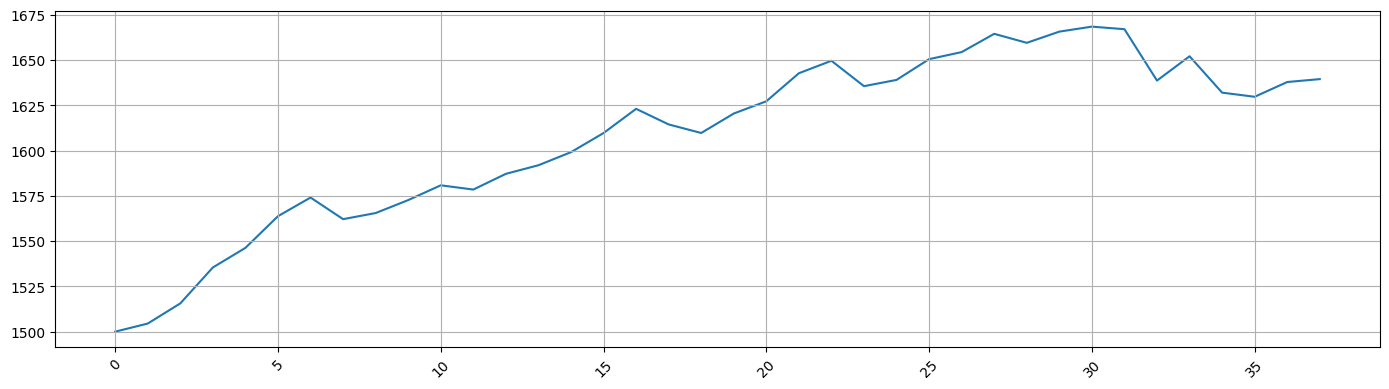

In [207]:
ELO_Liverpool = util.extract_elo_history(data, 'Liverpool')
#ELO_Liverpool.set_index('Date', inplace=True)
util.plot_series(ELO_Liverpool['ELO'], figsize=figsize)

In [208]:
data = util.add_discrete_league_columns(data)
data = util.add_discrete_result_columns(data)
data = util.add_discrete_season_columns(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO,E0,A,H,D,2324
0,E0,2023-08-11,Burnley,Man City,0,3,A,0,2,A,...,1500,0,0.562395,0.15534,0.282265,True,True,False,False,True
1,E0,2023-08-12,Arsenal,Nott'm Forest,2,1,H,2,0,H,...,1500,0,0.562395,0.15534,0.282265,True,False,True,False,True
2,E0,2023-08-12,Bournemouth,West Ham,1,1,D,0,0,D,...,1500,0,0.562395,0.15534,0.282265,True,False,False,True,True
3,E0,2023-08-12,Brighton,Luton,4,1,H,1,0,H,...,1500,0,0.562395,0.15534,0.282265,True,False,True,False,True
4,E0,2023-08-12,Everton,Fulham,0,1,A,0,0,D,...,1500,0,0.562395,0.15534,0.282265,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2024-05-19,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,1571.29932,-65.703388,0.451919,0.194557,0.353524,True,False,True,False,True
376,E0,2024-05-19,Liverpool,Wolves,2,0,H,2,0,H,...,1439.773079,199.700043,0.816171,0.065255,0.118573,True,False,True,False,True
377,E0,2024-05-19,Luton,Fulham,2,4,A,1,2,A,...,1456.869965,-99.874511,0.392325,0.215712,0.391964,True,True,False,False,True
378,E0,2024-05-19,Man City,West Ham,3,1,H,2,1,H,...,1482.605015,239.736638,0.849321,0.053488,0.097191,True,False,True,False,True


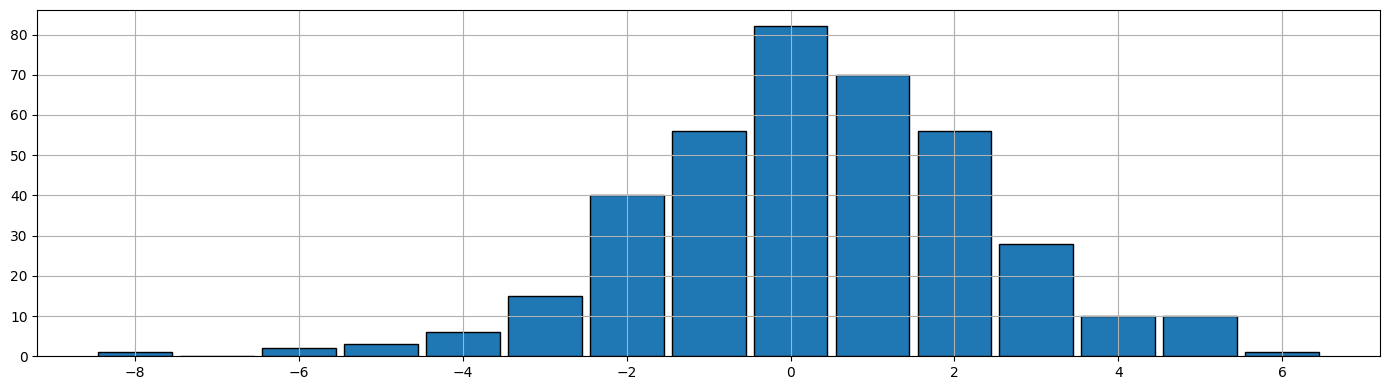

In [209]:
util.plot_discrete_histogram(data['FTHG']-data['FTAG'], figsize=figsize)

/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


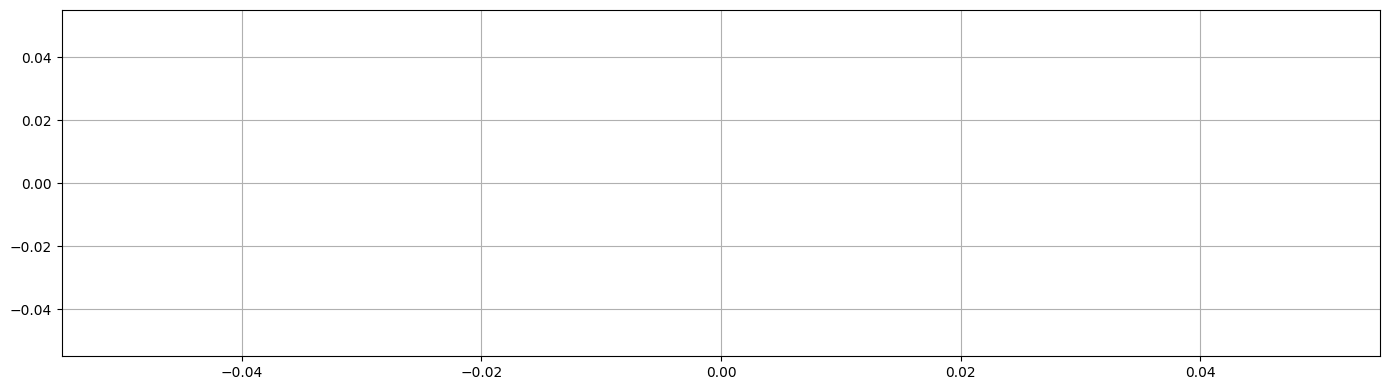

In [210]:
util.plot_histogram(data.loc[data['Div'] == 'E1', 'Home ELO'], figsize=figsize, bins=50)

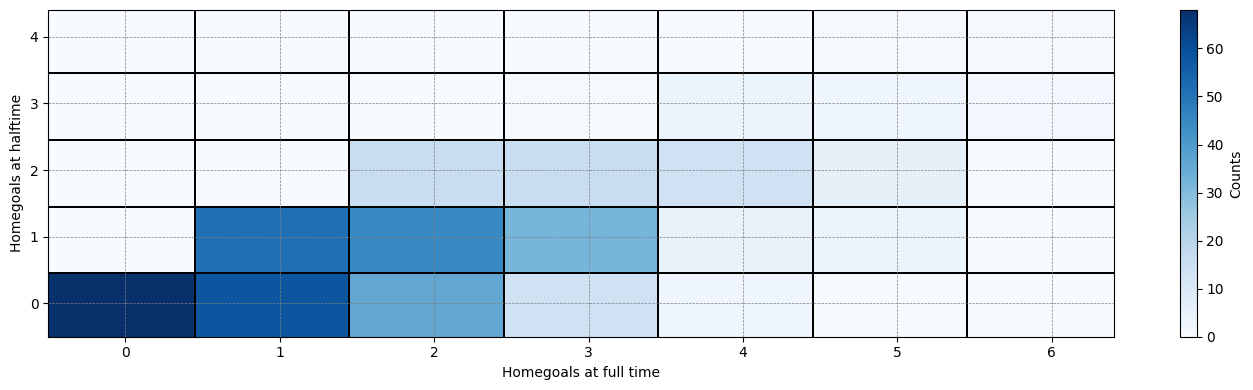

In [211]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['HTHG'], x_label='Homegoals at full time', y_label='Homegoals at halftime', figsize=figsize)

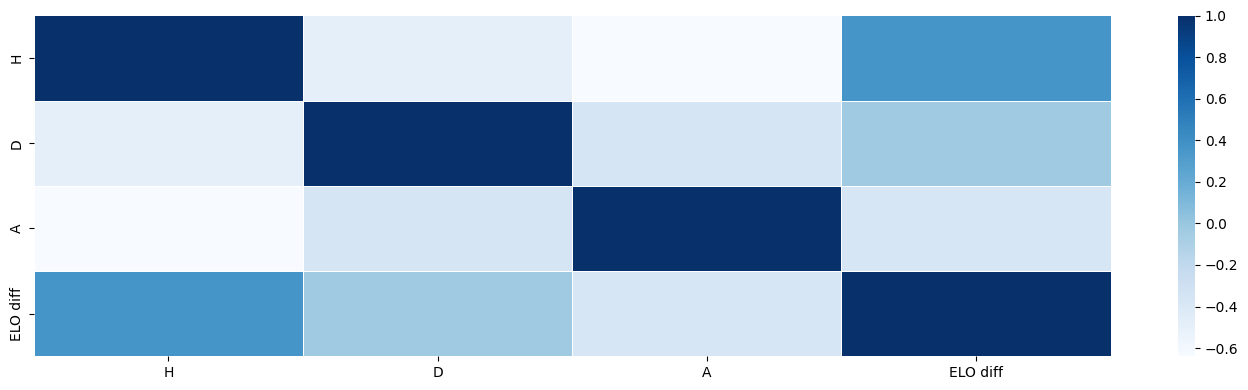

In [212]:
util.plot_correlation_matrix(data[['H', 'D', 'A', 'ELO diff']], figsize=figsize)

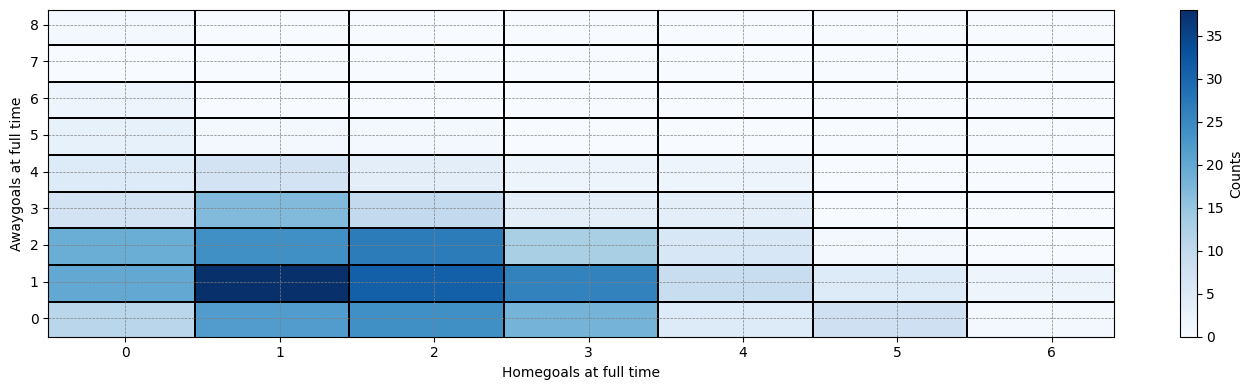

In [213]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['FTAG'], x_label='Homegoals at full time', y_label='Awaygoals at full time', figsize=figsize)

In [214]:
#Legg til kolonne for mål scort forrige 5 kamper
data = util.add_sequential_column(data, 'FTHG', 'FTAG', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til kolonne for mål sluppet inn forrige 5 kamper
data = util.add_sequential_column(data, 'FTHG', 'FTAG', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til kolonne for målforskjell forrige 5 kamper
data['Home Goal Difference last 5'] = data['FTHG_Sum_5'] - data['FTHG_Sum_5_opponent']
data['Away Goal Difference last 5'] = data['FTAG_Sum_5'] - data['FTAG_Sum_5_opponent']
#Legg til endring i ELO forrige 5 kamper
data = util.add_sequential_column(data, 'Home ELO', 'Away ELO', n=5, operation='Change', regard_opponent=False, include_current=True)
#Legg til snitt-ELO på motstander forrige 5 kamper
data = util.add_sequential_column(data, 'Home ELO', 'Away ELO', n=5, operation='Mean', regard_opponent=True, include_current=False)
#Legg til poeng forrige 5 kamper
data = util.add_sequential_column(data, 'Home', 'Away', n=5, operation='Points', regard_opponent=False, include_current=False)
#Legg til mål scoret ved pause forrige 5 kamper
data = util.add_sequential_column(data, 'HTHG', 'HTAG', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til mål sluppet inn ved pause forrige 5 kamper
data = util.add_sequential_column(data, 'HTHG', 'HTAG', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til målforskjell ved pause forrige 5 kamper
data['Home Goal Difference at halftime last 5'] = data['HTHG_Sum_5'] - data['HTHG_Sum_5_opponent']
data['Away Goal Difference at halftime last 5'] = data['HTAG_Sum_5'] - data['HTAG_Sum_5_opponent']
#Legg til skudd på mål forrige 5 kamper
data = util.add_sequential_column(data, 'HST', 'AST', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til skudd på mål sluppet inn forrige 5 kamper
data = util.add_sequential_column(data, 'HST', 'AST', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til skudd på mål differanse forrige 5 kamper
data['Home Shots on target difference last 5'] = data['HST_Sum_5'] - data['HST_Sum_5_opponent']
data['Away Shots on target difference last 5'] = data['AST_Sum_5'] - data['AST_Sum_5_opponent']
#Legg til skudd forrige 5 kamper
data = util.add_sequential_column(data, 'HS', 'AS', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til skudd sluppet inn forrige 5 kamper
data = util.add_sequential_column(data, 'HS', 'AS', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til skudd differanse forrige 5 kamper
data['Home Shots difference last 5'] = data['HS_Sum_5'] - data['HS_Sum_5_opponent']
data['Away Shots difference last 5'] = data['AS_Sum_5'] - data['AS_Sum_5_opponent']


#Legg til cornere forrige 5 kamper
data = util.add_sequential_column(data, 'HC', 'AC', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til cornere sluppet inn forrige 5 kamper
data = util.add_sequential_column(data, 'HC', 'AC', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til cornere differanse forrige 5 kamper
data['Home Corners difference last 5'] = data['HC_Sum_5'] - data['HC_Sum_5_opponent']
data['Away Corners difference last 5'] = data['AC_Sum_5'] - data['AC_Sum_5_opponent']
#Legg til gule kort forrige 5 kamper
data = util.add_sequential_column(data, 'HY', 'AY', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til gule kort hos motstander forrige 5 kamper
data = util.add_sequential_column(data, 'HY', 'AY', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til gule kort differanse forrige 5 kamper
data['Home Yellow cards difference last 5'] = data['HY_Sum_5'] - data['HY_Sum_5_opponent']
data['Away Yellow cards difference last 5'] = data['AY_Sum_5'] - data['AY_Sum_5_opponent']
#Legg til røde kort forrige 5 kamper
data = util.add_sequential_column(data, 'HR', 'AR', n=5, operation='Sum', regard_opponent=False, include_current=False)
#Legg til røde kort hos motstander forrige 5 kamper
data = util.add_sequential_column(data, 'HR', 'AR', n=5, operation='Sum', regard_opponent=True, include_current=False)
#Legg til røde kort differanse forrige 5 kamper
data['Home Red cards difference last 5'] = data['HR_Sum_5'] - data['HR_Sum_5_opponent']
data['Away Red cards difference last 5'] = data['AR_Sum_5'] - data['AR_Sum_5_opponent']




In [215]:
data['Goals scored diff last 5'] = data['FTHG_Sum_5'] - data['FTAG_Sum_5']
data['Goals conceded diff last 5'] = data['FTHG_Sum_5_opponent'] - data['FTAG_Sum_5_opponent']
data['Goal difference diff last 5'] = data['Home Goal Difference last 5'] - data['Away Goal Difference last 5']

data['ELO change diff last 5'] = data['Home ELO_Change_5'] - data['Away ELO_Change_5']
data['Opponent ELO mean last 5 diff'] = data['Home ELO_Mean_5_opponent'] - data['Away ELO_Mean_5_opponent']

data['Points diff last 5'] = data['Home_Points_5'] - data['Away_Points_5']

data['Goals scored at halftime diff last 5'] = data['HTHG_Sum_5'] - data['HTAG_Sum_5']
data['Goals conceded at halftime diff last 5'] = data['HTHG_Sum_5_opponent'] - data['HTAG_Sum_5_opponent']
data['Goal difference at halftime diff last 5'] = data['Home Goal Difference at halftime last 5'] - data['Away Goal Difference at halftime last 5']

data['Shots on target diff last 5'] = data['HST_Sum_5'] - data['AST_Sum_5']
data['Shots on target conceded diff last 5'] = data['HST_Sum_5_opponent'] - data['AST_Sum_5_opponent']

data['Shots diff last 5'] = data['HS_Sum_5'] - data['AS_Sum_5']
data['Shots conceded diff last 5'] = data['HS_Sum_5_opponent'] - data['AS_Sum_5_opponent']

data['Corners diff last 5'] = data['HC_Sum_5'] - data['AC_Sum_5']
data['Corners conceded diff last 5'] = data['HC_Sum_5_opponent'] - data['AC_Sum_5_opponent']

data['Yellow cards diff last 5'] = data['HY_Sum_5'] - data['AY_Sum_5']
data['Yellow cards conceded diff last 5'] = data['HY_Sum_5_opponent'] - data['AY_Sum_5_opponent']

data['Red cards diff last 5'] = data['HR_Sum_5'] - data['AR_Sum_5']
data['Red cards conceded diff last 5'] = data['HR_Sum_5_opponent'] - data['AR_Sum_5_opponent']

In [217]:
for s in data.columns:
	print(s)

Div
Date
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
Referee
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
Season
Goal difference
Home ELO
Away ELO
ELO diff
Home_prob_ELO
Draw_prob_ELO
Away_prob_ELO
E0
A
H
D
2324
FTHG_Sum_5
FTAG_Sum_5
FTHG_Sum_5_opponent
FTAG_Sum_5_opponent
Home Goal Difference last 5
Away Goal Difference last 5
Home ELO_Change_5
Away ELO_Change_5
Home ELO_Mean_5_opponent
Away ELO_Mean_5_opponent
Home_Points_5
Away_Points_5
HTHG_Sum_5
HTAG_Sum_5
HTHG_Sum_5_opponent
HTAG_Sum_5_opponent
Home Goal Difference at halftime last 5
Away Goal Difference at halftime last 5
HST_Sum_5
AST_Sum_5
HST_Sum_5_opponent
AST_Sum_5_opponent
Home Shots on target difference last 5
Away Shots on target difference last 5
HS_Sum_5
AS_Sum_5
HS_Sum_5_opponent
AS_Sum_5_opponent
Home Shots difference last 5
Away Shots difference last 5
HC_Sum_5
AC_Sum_5
HC_Sum_5_opponent
AC_Sum_5_opponent
Home Corners difference last 5
Away Corners difference last 5
HY_Sum_5
AY_Sum_5
HY_Sum_5_opponent
AY_Sum_5_opponent
H

In [219]:
data[['H', 'D', 'A', 'ELO diff', 'Goals scored diff last 5', 'Goals conceded diff last 5', 'Goal difference diff last 5', 'ELO change diff last 5', 'Opponent ELO mean last 5 diff', 'Points diff last 5', 'Goal difference at halftime diff last 5', 'Shots on target diff last 5', 'Shots on target conceded diff last 5', 'Shots diff last 5', 'Shots conceded diff last 5', 'Corners diff last 5', 'Corners conceded diff last 5', 'Yellow cards diff last 5', 'Red cards diff last 5']].corr()

,H,D,A,ELO diff,Goals scored diff last 5,Goals conceded diff last 5,Goal difference diff last 5,ELO change diff last 5,Opponent ELO mean last 5 diff,Points diff last 5,Goal difference at halftime diff last 5,Shots on target diff last 5,Shots on target conceded diff last 5,Shots diff last 5,Shots conceded diff last 5,Corners diff last 5,Corners conceded diff last 5,Yellow cards diff last 5,Red cards diff last 5
H,1.000000,-0.484664,-0.639187,0.363662,0.253496,-0.248300,0.301307,0.169234,-0.041366,0.302159,0.233744,0.326518,-0.331823,0.364773,-0.339336,0.260786,-0.229349,-0.058127,-0.050417
D,-0.484664,1.000000,-0.362898,-0.024670,0.027309,0.027278,0.001688,0.063211,0.064508,-0.013067,-0.017747,-0.033998,0.106009,-0.107599,0.108753,-0.102061,0.058254,0.034876,0.033509
A,-0.639187,-0.362898,1.000000,-0.365724,-0.294064,0.240534,-0.322470,-0.235863,-0.012649,-0.310405,-0.233407,-0.317952,0.260290,-0.293994,0.265882,-0.188085,0.193110,0.031259,0.024248
ELO diff,0.363662,-0.024670,-0.365724,1.000000,0.612765,-0.605090,0.731119,0.444268,-0.035942,0.768587,0.498631,0.623796,-0.531090,0.671698,-0.512488,0.500692,-0.456057,-0.105040,-0.073350
Goals scored diff last 5,0.253496,0.027309,-0.294064,0.612765,1.000000,-0.386647,0.850935,0.598236,-0.173703,0.778251,0.724257,0.732264,-0.405623,0.525990,-0.397264,0.367987,-0.343674,-0.106463,-0.054002
Goals conceded diff last 5,-0.248300,0.027278,0.240534,-0.605090,-0.386647,1.000000,-0.813432,-0.577067,0.176168,-0.715055,-0.560423,-0.413987,0.729233,-0.499310,0.549662,-0.340453,0.342328,0.153670,0.126463
Goal difference diff last 5,0.301307,0.001688,-0.322470,0.731119,0.850935,-0.813432,1.000000,0.705995,-0.209896,0.898125,0.775998,0.697642,-0.671179,0.616140,-0.563629,0.426005,-0.411739,-0.154673,-0.106089
ELO change diff last 5,0.169234,0.063211,-0.235863,0.444268,0.598236,-0.577067,0.705995,1.000000,-0.052355,0.792044,0.511391,0.435664,-0.445719,0.338035,-0.342984,0.200094,-0.160761,-0.019720,-0.042625
Opponent ELO mean last 5 diff,-0.041366,0.064508,-0.012649,-0.035942,-0.173703,0.176168,-0.209896,-0.052355,1.000000,-0.206932,-0.118356,-0.220180,0.185487,-0.229320,0.277881,-0.289988,0.255090,0.145338,-0.003994
Points diff last 5,0.302159,-0.013067,-0.310405,0.768587,0.778251,-0.715055,0.898125,0.792044,-0.206932,1.000000,0.627225,0.657780,-0.601166,0.606683,-0.533603,0.457017,-0.368091,-0.127960,-0.083711
